In [1]:
import pandas as pd

# path to the location in Google Drive
file_path = '/content/drive/MyDrive/Untitled folder/Diabetes_Prediction/diabetes.csv'

# Load dataset
df = pd.read_csv(file_path)

# Display the first few rows Data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Columns with zero values
zero_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# Print zero value column
for column in zero_values:
    zero_count = (df[column] == 0).sum()
    print(f"Zero values in {column}: {zero_count}")

Zero values in Glucose: 5
Zero values in BloodPressure: 35
Zero values in SkinThickness: 227
Zero values in Insulin: 374
Zero values in BMI: 11


In [3]:
# Replace zero values with median
for column in zero_values:
    median_value = df[df[column] != 0][column].median()
    df[column] = df[column].replace(0, median_value)

In [4]:
# Confirm replacement
for column in zero_values:
    count_zero = (df[column] == 0).sum()
    print(f"Zero values in {column} after replacement: {count_zero}")


Zero values in Glucose after replacement: 0
Zero values in BloodPressure after replacement: 0
Zero values in SkinThickness after replacement: 0
Zero values in Insulin after replacement: 0
Zero values in BMI after replacement: 0


In [5]:
# columns with outliers
columns_outliers = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
# IQR and bounds for outliers
outlier_bounds = {}
for column in columns_outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[column] = (lower_bound, upper_bound)
    print(f"{column} - Lower bound: {lower_bound}, Upper bound: {upper_bound}")

Glucose - Lower bound: 39.0, Upper bound: 201.0
BloodPressure - Lower bound: 40.0, Upper bound: 104.0
SkinThickness - Lower bound: 14.5, Upper bound: 42.5
Insulin - Lower bound: 112.875, Upper bound: 135.875
BMI - Lower bound: 13.849999999999998, Upper bound: 50.25


In [6]:
# Replace outliers with median value of column
for column, bounds in outlier_bounds.items():
    median_of_column = df[column].median()
    df.loc[df[column] < bounds[0], column] = median_of_column
    df.loc[df[column] > bounds[1], column] = median_of_column

In [7]:
# Print updated statistics for columns
for column in columns_outliers:
    print(df[column].describe())


count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
count    768.000000
mean      72.108073
std       10.874178
min       40.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      104.000000
Name: BloodPressure, dtype: float64
count    768.000000
mean      28.759115
std        5.766472
min       15.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       42.000000
Name: SkinThickness, dtype: float64
count    768.000000
mean     124.972656
std        1.698387
min      114.000000
25%      125.000000
50%      125.000000
75%      125.000000
max      135.000000
Name: Insulin, dtype: float64
count    768.000000
mean      32.206380
std        6.410497
min       18.200000
25%       27.500000
50%       32.300000
75%       36.300000
max       50.000000
Name: BMI, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


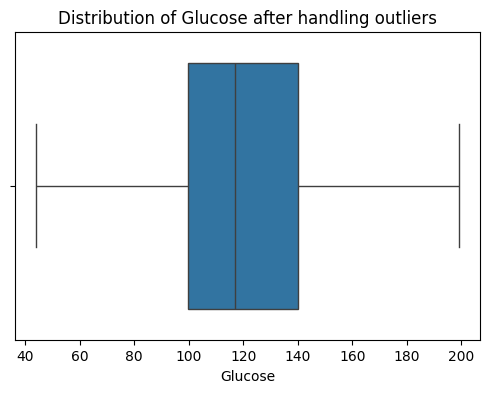

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


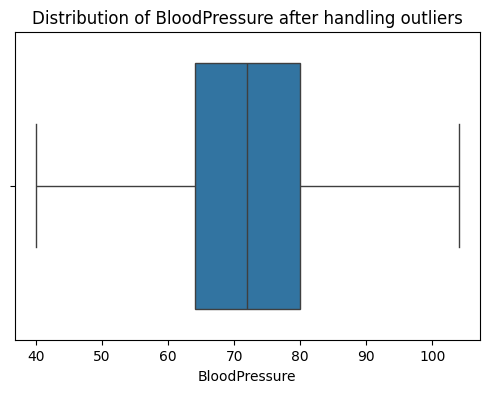

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


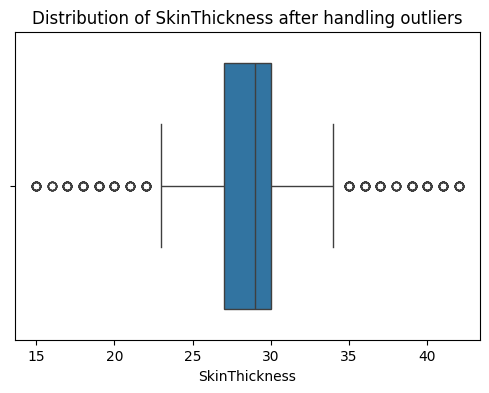

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


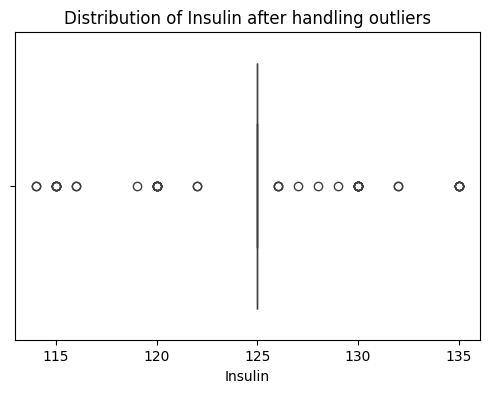

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


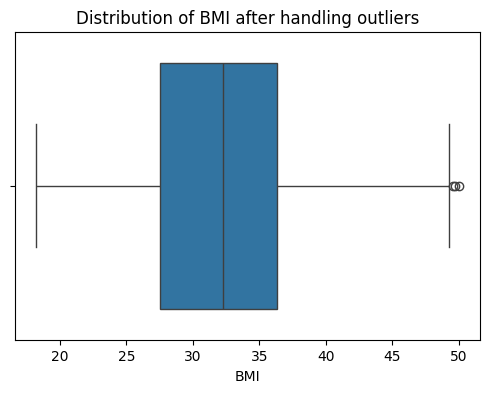

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions after handling outliers
for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Distribution of {column} after handling outliers')
    plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Define target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Normalization of data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# Perceptron model training
import numpy as np
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000, decay=False, decay_rate=0.01):
        self.lr = learning_rate
        self.epochs = epochs
        self.decay = decay
        self.decay_rate = decay_rate
        self.weights = None
        self.bias = None

  # Activation function
    def activation(self, x):
        return np.where(x >= 0, 1, -1)
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y <= 0, -1, 1)

        for i in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation(linear_output)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
            if self.decay:
                self.lr *= (1 / (1 + self.decay_rate * i))

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)




In [12]:
# Changing the value for hyperparametric tuning
model = Perceptron(learning_rate=0.001, epochs=100, decay=True, decay_rate=0.0001)
model.fit(X_train, y_train)

# Prediction model for change parameter
predictions = model.predict(X_test)

# Checking Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, np.where(predictions > 0, 1, 0))
print(f"Accuracy of the Perceptron model: {accuracy:.2f}")


Accuracy of the Perceptron model: 0.76


In [13]:
# Again changing the value for hyperparametric tuning
model = Perceptron(learning_rate=0.1, epochs=50, decay=True, decay_rate=0.01)
model.fit(X_train, y_train)

# Prediction model for change parameter
predictions = model.predict(X_test)

# Checking Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, np.where(predictions > 0, 1, 0))
print(f"Accuracy of the Perceptron model: {accuracy:.2f}")

Accuracy of the Perceptron model: 0.78


In [15]:
# Changing the value for training
model = Perceptron(learning_rate=0.0001, epochs=200, decay=True, decay_rate=0.1)
model.fit(X_train, y_train)

# Prediction model for change parameter
predictions = model.predict(X_test)

# Checking Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, np.where(predictions > 0, 1, 0))
print(f"Accuracy of the Perceptron model: {accuracy:.2f}")

Accuracy of the Perceptron model: 0.79


In [16]:
# Changing the value for training
model = Perceptron(learning_rate=0.01, epochs=50, decay=True, decay_rate=0.1)
model.fit(X_train, y_train)

# Prediction model for change parameter
predictions = model.predict(X_test)

# Checking Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, np.where(predictions > 0, 1, 0))
print(f"Accuracy of the Perceptron model: {accuracy:.2f}")

Accuracy of the Perceptron model: 0.81


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

# Classification Report

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.91      0.86        99
           1       0.80      0.64      0.71        55

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



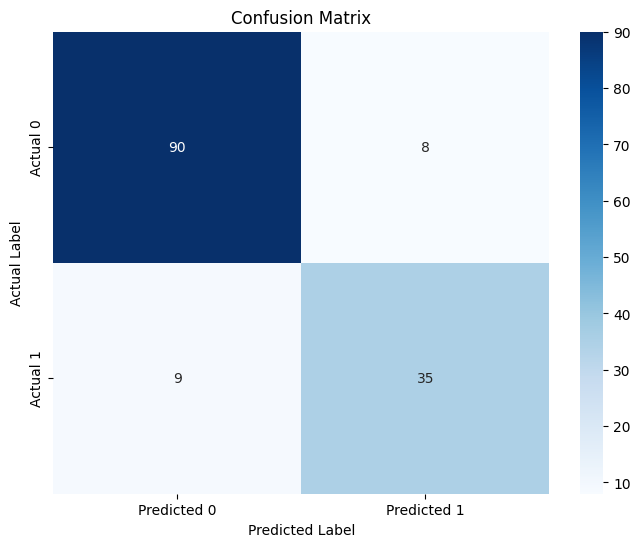

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def compute_confusion_values(precision, recall, support):
    TP = int(recall * support)
    FP = int((TP / precision) - TP)
    FN = support - TP
    return TP, FP, FN

# from classification report
precision_0, recall_0, support_0 = 0.82, 0.91, 99
precision_1, recall_1, support_1 = 0.80, 0.64, 55

# TP, FP, FN for both class
TP_0, FP_0, FN_0 = compute_confusion_values(precision_0, recall_0, support_0)
TP_1, FP_1, FN_1 = compute_confusion_values(precision_1, recall_1, support_1)

# Calculate TN
TN_0 = support_1 - FP_1
TN_1 = support_0 - FP_0

# Confusion matrix in binary classification format:
cm = np.array([[TP_0, FP_1],
               [FN_0, TP_1]])

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


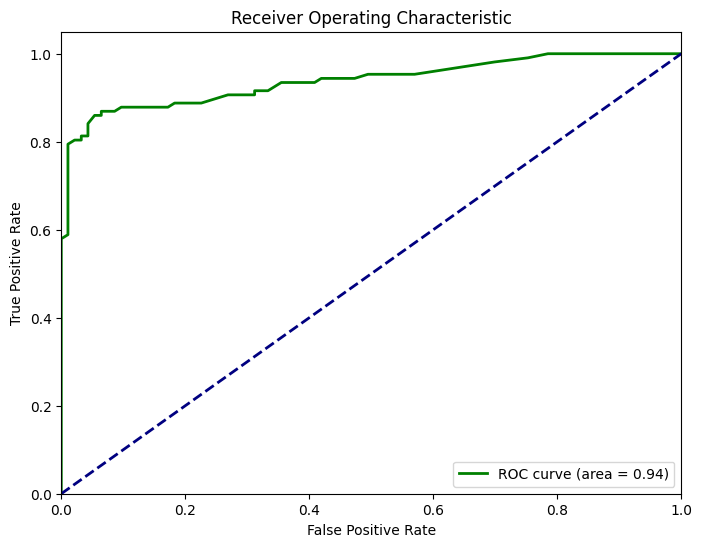

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr, tpr, color='Green',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
